In [2]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import payments_manager as pm

#pm.help()
pm.init(debug=True)
pm.info()
df_jo = pm.df('df_jo')
df_jo.info()

Lista de dataframes: ['cr', 'fe', 'cr_cp', 'fe_cp', 'df_jo', 'df_jall']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   id_cr                       32094 non-null  int64          
 1   amount                      32094 non-null  float64        
 2   stat_cr                     32094 non-null  object         
 3   created_at                  32094 non-null  datetime64[ns] 
 4   user_id                     32094 non-null  int64          
 5   active                      32094 non-null  int64          
 6   moderated_at                21759 non-null  datetime64[ns] 
 7   reimbursement_date          32094 non-null  datetime64[ns] 
 8   cash_request_received_date  24149 non-null  datetime64[ns] 
 9   money_back_date             23917 non-null  datetime64[ns] 
 10  transfer_type               32094 

In [3]:
# Filtrar filas con estado de fees "accepted"
#df_jo = df_jo[df_jo['stat_fe'] == 'accepted']

# Filtrar filas con tipo de transferencia "regular" o "instant"
#df_jo = df_jo[df_jo['transfer_type'] == 'instant']

# Excluir datos de noviembre de 2020
df_jo = df_jo[~((df_jo['Mes_created_at'].dt.year == 2020) & (df_jo['Mes_created_at'].dt.month == 11))]

# Calcular métricas mensuales
monthly_data = df_jo.groupby('Mes_created_at').agg(
    total_fees=('fee', 'sum'),
    total_adelantos=('amount', 'sum')
).reset_index()

# Calcular el ratio de fees sobre adelantos
monthly_data['fees_ratio'] = monthly_data['total_fees'] / monthly_data['total_adelantos'] * 100

# Mostrar la evolución mensual
print(monthly_data)


   Mes_created_at  total_fees  total_adelantos  fees_ratio
0         2019-11         0.0              1.0    0.000000
1         2019-12         0.0          27297.0    0.000000
2         2020-01         0.0          21587.0    0.000000
3         2020-02         0.0          16653.0    0.000000
4         2020-03         0.0          23549.0    0.000000
5         2020-04         5.0          46093.0    0.010848
6         2020-05      1285.0          94406.0    1.361142
7         2020-06      8725.0         344186.0    2.534967
8         2020-07     10395.0         436097.0    2.383644
9         2020-08     17565.0         446645.0    3.932653
10        2020-09     22935.0         503922.0    4.551300
11        2020-10     43815.0         709233.0    6.177801


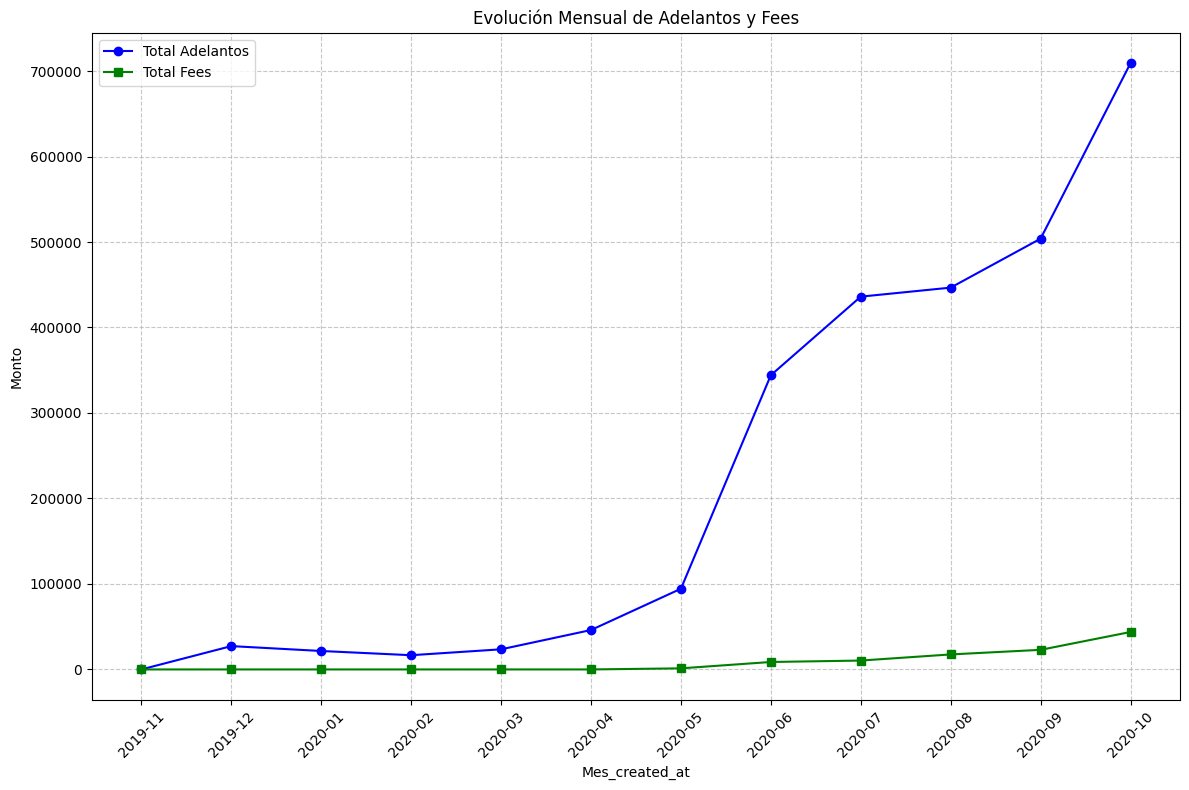

In [4]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar adelantos y fees en el mismo eje y
ax.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['total_adelantos'], 
    marker='o', 
    label='Total Adelantos', 
    color='blue'
)
ax.plot(
    monthly_data['Mes_created_at'].astype(str), 
    monthly_data['total_fees'], 
    marker='s', 
    label='Total Fees', 
    color='green'
)

# Configurar etiquetas y título
ax.set_xlabel('Mes_created_at')
ax.set_ylabel('Monto')
ax.set_title('Evolución Mensual de Adelantos y Fees')
ax.legend()  # Mostrar la leyenda para las líneas
ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


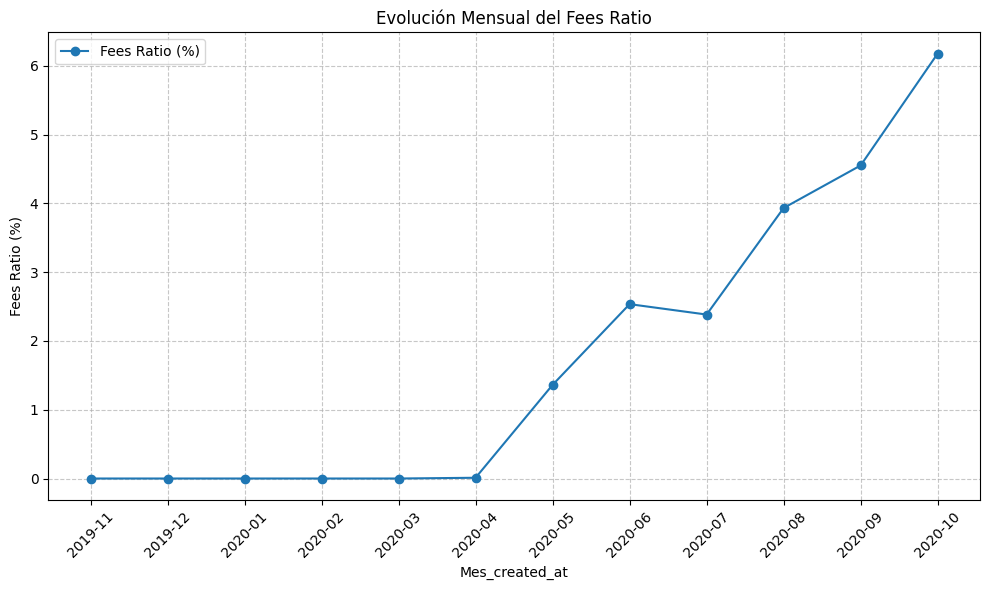

In [5]:
# Graficar la evolución del fees_ratio
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Mes_created_at'].astype(str), monthly_data['fees_ratio'], marker='o', label='Fees Ratio (%)')
plt.title('Evolución Mensual del Fees Ratio')
plt.xlabel('Mes_created_at')
plt.ylabel('Fees Ratio (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
# Calcular las métricas mensuales segregadas por transfer_type
monthly_data = df_jo.groupby(['Mes_created_at', 'transfer_type']).agg(
    total_fees=('fee', 'sum'),
    total_adelantos=('amount', 'sum')
).reset_index()

# Calcular el ratio de fees sobre adelantos
monthly_data['fees_ratio'] = monthly_data['total_fees'] / monthly_data['total_adelantos'] * 100

monthly_data

,Mes_created_at,transfer_type,total_fees,total_adelantos,fees_ratio
0,2019-11,regular,0.0,1.0,0.000000
1,2019-12,regular,0.0,27297.0,0.000000
2,2020-01,regular,0.0,21587.0,0.000000
3,2020-02,regular,0.0,16653.0,0.000000
4,2020-03,regular,0.0,23549.0,0.000000
5,2020-04,regular,5.0,46093.0,0.010848
6,2020-05,regular,1285.0,94406.0,1.361142
7,2020-06,regular,8725.0,344186.0,2.534967
8,2020-07,instant,1390.0,40669.0,3.417837
9,2020-07,regular,9005.0,395428.0,2.277279


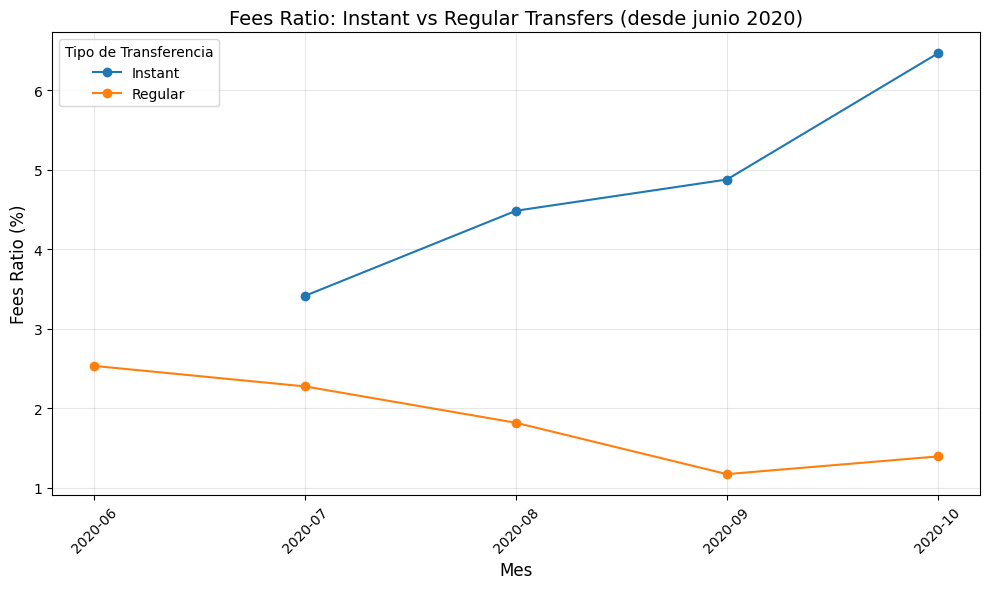

In [7]:
# Filtrar datos desde junio de 2020
monthly_data_filtered = monthly_data[monthly_data['Mes_created_at'] >= '2020-06']

# Pivotar los datos para facilitar la gráfica
pivot_data = monthly_data_filtered.pivot(index='Mes_created_at', columns='transfer_type', values='fees_ratio')

# Asegurarse de que el índice sea un string para graficar
pivot_data.index = pivot_data.index.astype(str)

# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(pivot_data.index, pivot_data['instant'], label='Instant', marker='o')
plt.plot(pivot_data.index, pivot_data['regular'], label='Regular', marker='o')

# Personalizar la gráfica
plt.title('Fees Ratio: Instant vs Regular Transfers (desde junio 2020)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Fees Ratio (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Transferencia')
plt.grid(alpha=0.3)

# Mostrar la gráfica
plt.tight_layout()
plt.show()



In [8]:
# Crear columna 'Cohorte' que indica el mes de la primera solicitud de cada cliente
df_jo['Cohorte'] = df_jo.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
df_jo.head(10)

,id_cr,amount,stat_cr,created_at,user_id,active,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,...,to_date,charge_moment,cr_received_date,to_receive_ini,to_receive_bank,to_reimbur,to_reimbur_cash,to_end,to_send,Cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873,804,1,2019-12-11 16:47:42.405646,2020-01-09 19:05:21.596363,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,29 days 23:59:59.999490,NaT,NaT,NaT,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780,231,1,2019-12-11 14:24:22.897988,2020-01-09 19:50:12.347780,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,30 days 00:00:00,NaT,NaT,NaT,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460,191,1,2019-12-11 09:46:59.777728,2020-01-09 19:13:35.825041,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,29 days 23:59:59.999581,NaT,NaT,NaT,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172,761,1,2019-12-18 14:26:18.128407,2020-01-09 19:16:10.879606,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,29 days 23:59:59.999434,NaT,NaT,NaT,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376,7686,1,2020-05-07 09:21:55.320193,2020-06-05 22:00:00.000000,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,30 days 12:00:21.122624,NaT,NaT,NaT,2020-05
5,2145,100.0,money_back,2020-05-23 20:58:55.129432,9489,1,2020-05-24 12:40:33.054910,2020-06-06 22:00:00.000000,2020-05-26,2020-07-06 03:36:03.023521,...,NaT,NaN,2020-05-26,2 days 03:01:04.870568,NaT,14 days 01:01:04.870568,NaT,-30 days +18:23:56.976479,NaT,2020-05
6,3512,100.0,rejected,2020-06-16 17:07:38.452652,14631,1,2020-06-17 10:21:21.360742,2020-07-11 23:51:00.000000,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,25 days 06:43:21.547348,NaT,NaT,NaT,2020-06
7,654,100.0,rejected,2020-02-10 01:11:53.808270,99000309,0,2020-02-10 09:11:21.350695,2020-03-11 01:11:53.807930,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,29 days 23:59:59.999660,NaT,NaT,NaT,2020-01
8,5672,100.0,canceled,2020-06-28 12:06:33.712840,99002499,0,NaT,2020-07-07 22:00:00.000000,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,9 days 09:53:26.287160,NaT,NaT,NaT,2020-06
9,71,90.0,rejected,2019-12-10 19:51:23.911206,897,1,2019-12-12 15:06:11.190299,2019-12-17 19:51:23.910748,NaT,NaT,...,NaT,NaN,NaT,NaT,NaT,6 days 23:59:59.999542,NaT,NaT,NaT,2019-12


numero de solicitudes (entiendo q es el total) las calcula con el id unico de cash_request
pero para instant y regular las calcula con todas. por lo que la suma de instant y regular no es la misma que num_solicitudes. 
creo que ahi habría que unificar criterio o especificar mejor qué es ese numero de solicitudes (y calcular el otro?)

In [9]:
# Agrupar los datos por cohorte y mes para calcular las métricas mensuales
cohort_analysis = df_jo.groupby(['Cohorte', 'Mes_created_at']).agg(
    Num_Clientes=('user_id', 'nunique'),  # Número de clientes únicos por cohorte y mes
    Num_Solicitudes=('id_cr', 'nunique'),  # Total de solicitudes únicas por cohorte y mes
    Solicitudes_Instant=('transfer_type', lambda x: (x == 'instant').sum()),  # Solicitudes tipo 'instant' por cohorte y mes
    Solicitudes_Regular=('transfer_type', lambda x: (x == 'regular').sum()),  # Solicitudes tipo 'regular' por cohorte y mes
    Clientes_con_fees=('fee', lambda x: (x > 0).sum()),  # Clientes con fees por cohorte y mes
    CR=('amount', 'sum'),  # Total de adelantos por cohorte y mes
    Fees=('fee', 'sum'),  # Total de fees por cohorte y mes
    # Contar las líneas con 'stat_fe' == 'accepted'
    paid_fees=('stat_fe', lambda x: (x == 'accepted').sum()),  
    # Contar las líneas con 'stat_fe' != 'accepted'
    non_paid_fees=('stat_fe', lambda x: (x != 'accepted').sum()),
    # Sumar 'total_amount' cuando 'stat_fe' == 'accepted'
    total_paid_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] == 'accepted'].sum()),
    # Sumar 'total_amount' cuando 'stat_fe' != 'accepted'
    total_non_paid_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] != 'accepted'].sum()),
     # Contar las líneas con 'stat_cr' == 'money_back'
    paid_cr=('stat_cr', lambda x: (x == 'money_back').sum()),  
    # Contar las líneas con 'stat_fe' != 'accepted'
    non_paid_cr=('stat_cr', lambda x: (x != 'money_back').sum()),
    # Sumar 'total_amount' cuando 'stat_fe' == 'accepted'
    total_paid_cr=('amount', lambda x: x[df_jo.loc[x.index, 'stat_cr'] == 'money_back'].sum()),
    # Sumar 'total_amount' cuando 'stat_fe' != 'accepted'
    total_non_paid_cr=('amount', lambda x: x[df_jo.loc[x.index, 'stat_cr'] != 'money_back'].sum()),
    # Métrica de "credit lapse" (diferencia entre reimbursement_date y created_at)
    credit_lapse=('reimbursement_date', lambda x: (x - df_jo.loc[x.index, 'created_at']).dt.days.mean()),
    # Métrica de "credit payment lapse" (diferencia entre money_back_date y reimbursement_date)
    credit_payment_lapse=('money_back_date', lambda x: (x - df_jo.loc[x.index, 'reimbursement_date']).dt.days.mean())

).reset_index()

# Calcular los porcentajes de non_paid_fees
cohort_analysis['paid_fees_percent_qty'] = (cohort_analysis['paid_fees'] / (cohort_analysis['paid_fees'] + cohort_analysis['non_paid_fees']))
cohort_analysis['paid_fees_percent_amount'] = (cohort_analysis['total_paid_fees'] / cohort_analysis['Fees'])*100  # % en monto
cohort_analysis['paid_cr_percent_qty'] = (cohort_analysis['paid_cr'] / (cohort_analysis['paid_cr'] + cohort_analysis['non_paid_cr']))
cohort_analysis['paid_cr_percent_amount'] = (cohort_analysis['total_paid_cr'] / cohort_analysis['CR'])   # % en monto

# Eliminar las columnas de pago y no pago
cohort_sizes_monthly = cohort_analysis.drop(
    ['paid_fees', 'non_paid_fees', 'total_paid_fees', 'total_non_paid_fees','paid_cr', 'non_paid_cr', 'total_paid_cr', 'total_non_paid_cr'], axis=1, errors='ignore')

# Mostrar los resultados de las cohortes por mes
cohort_analysis


,Cohorte,Mes_created_at,Num_Clientes,Num_Solicitudes,Solicitudes_Instant,Solicitudes_Regular,Clientes_con_fees,CR,Fees,paid_fees,...,paid_cr,non_paid_cr,total_paid_cr,total_non_paid_cr,credit_lapse,credit_payment_lapse,paid_fees_percent_qty,paid_fees_percent_amount,paid_cr_percent_qty,paid_cr_percent_amount
0,2019-11,2019-11,1,1,0,1,0,1.0,0.0,0,...,0,1,0.0,1.0,16.000000,NaN,0.000000,NaN,0.000000,0.000000
1,2019-11,2019-12,1,1,0,1,0,100.0,0.0,0,...,0,1,0.0,100.0,6.000000,NaN,0.000000,NaN,0.000000,0.000000
2,2019-11,2020-04,1,1,0,1,0,100.0,0.0,0,...,1,0,100.0,0.0,14.000000,8.000000,0.000000,NaN,1.000000,1.000000
3,2019-11,2020-05,1,1,0,5,5,50.0,25.0,1,...,5,0,50.0,0.0,125.000000,-45.000000,0.200000,20.000000,1.000000,1.000000
4,2019-11,2020-08,1,1,2,0,2,20.0,10.0,2,...,2,0,20.0,0.0,55.000000,-8.000000,1.000000,100.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2020-08,2020-09,291,342,433,59,351,35520.0,1755.0,253,...,313,179,23710.0,11810.0,34.894309,7.150150,0.514228,72.079772,0.636179,0.667511
69,2020-08,2020-10,245,279,310,29,283,26710.0,1415.0,230,...,296,43,23430.0,3280.0,24.241888,4.027027,0.678466,81.272085,0.873156,0.877200
70,2020-09,2020-09,1988,2220,3157,204,2378,263957.0,11890.0,1642,...,2175,1186,178508.0,85449.0,31.353764,9.304796,0.488545,69.049622,0.647129,0.676277
71,2020-09,2020-10,679,727,866,70,845,65520.0,4225.0,634,...,819,117,57935.0,7585.0,24.603632,4.123040,0.677350,75.029586,0.875000,0.884234


In [10]:
cohort_analysis.describe()

,Num_Clientes,Num_Solicitudes,Solicitudes_Instant,Solicitudes_Regular,Clientes_con_fees,CR,Fees,paid_fees,non_paid_fees,total_paid_fees,...,paid_cr,non_paid_cr,total_paid_cr,total_non_paid_cr,credit_lapse,credit_payment_lapse,paid_fees_percent_qty,paid_fees_percent_amount,paid_cr_percent_qty,paid_cr_percent_amount
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.000000,73.000000,71.000000,73.000000,56.000000,73.000000,73.000000
mean,278.547945,326.438356,265.191781,172.534247,286.904110,36570.808219,1434.589041,201.890411,235.835616,1009.520548,...,317.082192,120.643836,26540.383562,10030.424658,29.829920,9.935222,0.354237,65.904509,0.738960,0.748434
std,655.544516,724.863780,827.000901,440.697020,782.266883,74077.063659,3911.833521,600.236818,455.606739,3001.706247,...,759.074359,260.496981,56947.231332,21819.590392,13.715959,15.690662,0.299052,22.426835,0.188623,0.190447
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,-45.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,34.000000,0.000000,17.000000,1.000000,4350.000000,5.000000,0.000000,25.000000,0.000000,...,33.000000,9.000000,3367.000000,685.000000,23.813953,4.309069,0.000000,52.091291,0.647129,0.666667
50%,62.000000,76.000000,3.000000,49.000000,35.000000,7400.000000,175.000000,24.000000,65.000000,120.000000,...,58.000000,19.000000,5513.000000,1750.000000,28.416667,8.579710,0.312329,68.927203,0.756098,0.777648
75%,245.000000,268.000000,87.000000,103.000000,181.000000,27197.000000,905.000000,114.000000,211.000000,570.000000,...,245.000000,86.000000,23230.000000,7585.000000,32.100699,13.593868,0.621302,80.718031,0.875000,0.884956
max,4828.000000,5068.000000,6042.000000,2764.000000,5909.000000,443477.000000,29550.000000,4715.000000,2143.000000,23580.000000,...,5656.000000,1326.000000,397067.000000,120709.000000,125.000000,104.216216,1.000000,100.000000,1.000000,1.000000


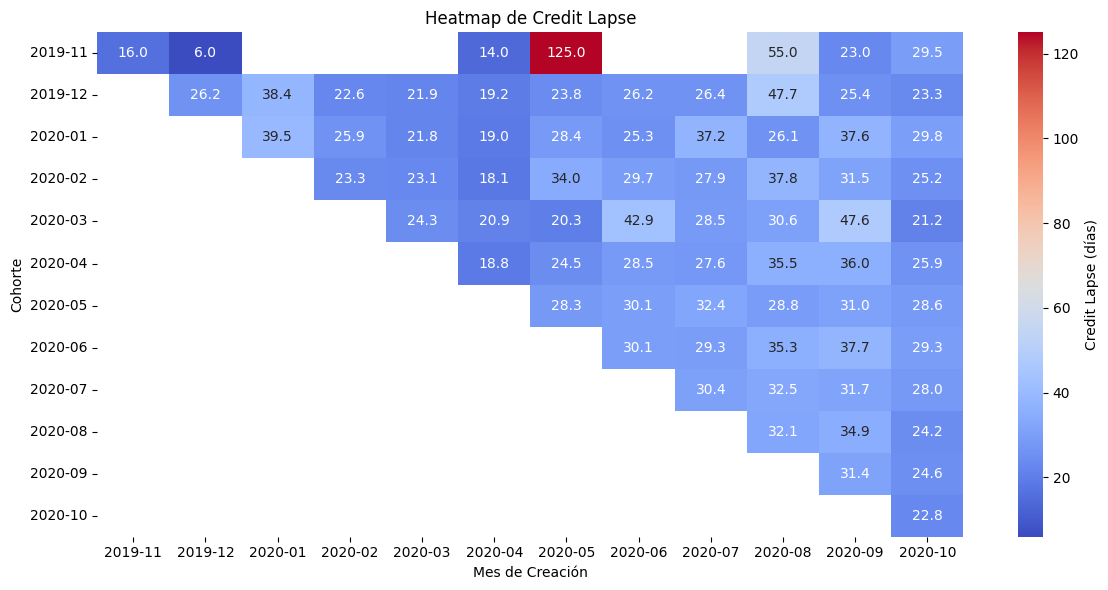

In [11]:
# Crear los datos para el heatmap
heatmap_data = cohort_analysis.pivot(
    index='Cohorte', 
    columns='Mes_created_at', 
    values='credit_lapse'
)

# Crear la figura para el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="coolwarm", 
    cbar_kws={'label': 'Credit Lapse (días)'}
)

# Personalizar el heatmap
plt.title('Heatmap de Credit Lapse')
plt.xlabel('Mes de Creación')
plt.ylabel('Cohorte')
plt.tight_layout()
plt.show()


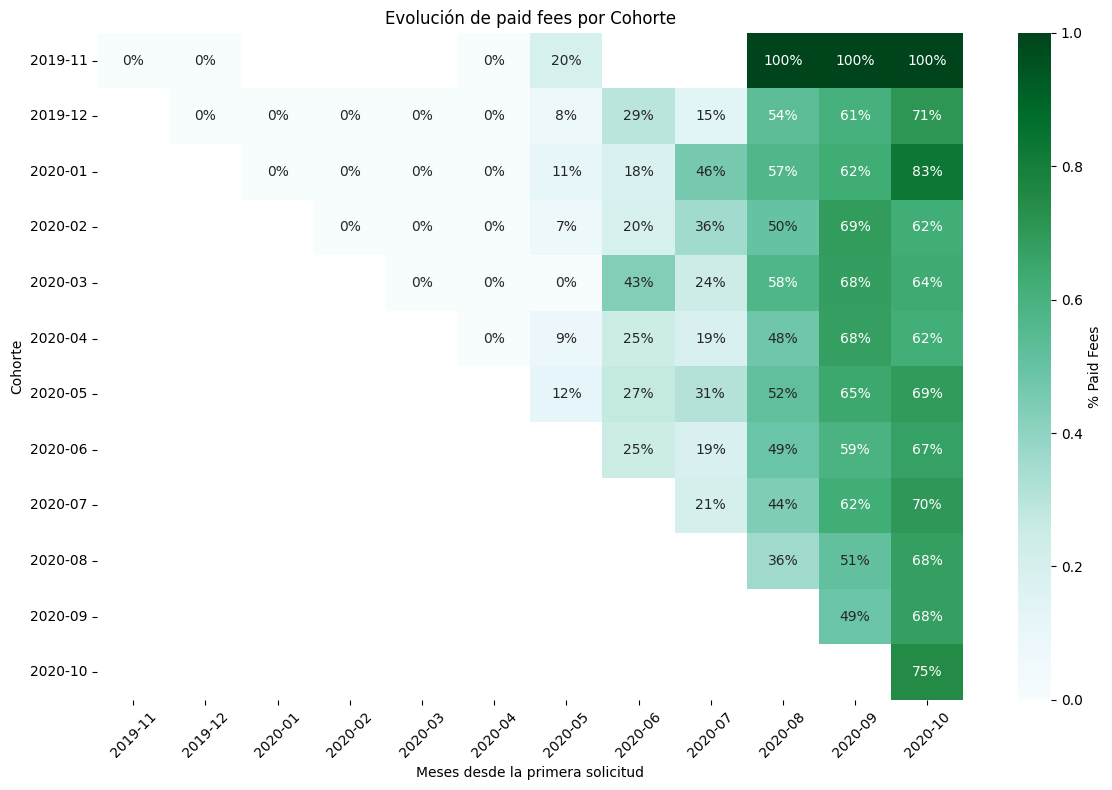

In [12]:
# Pivotar los datos para crear una matriz de fees pagados por cohorte para cada mes
paid_fees_heatmap_data = cohort_analysis.pivot(index='Cohorte', columns='Mes_created_at', values='paid_fees_percent_qty')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(paid_fees_heatmap_data, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn', cbar_kws={'label': '% Paid Fees'})

# Añadir etiquetas y título
plt.title('Evolución de paid fees por Cohorte')
plt.xlabel('Meses desde la primera solicitud')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)

# Mostrar el heatmap
plt.tight_layout()
plt.show()


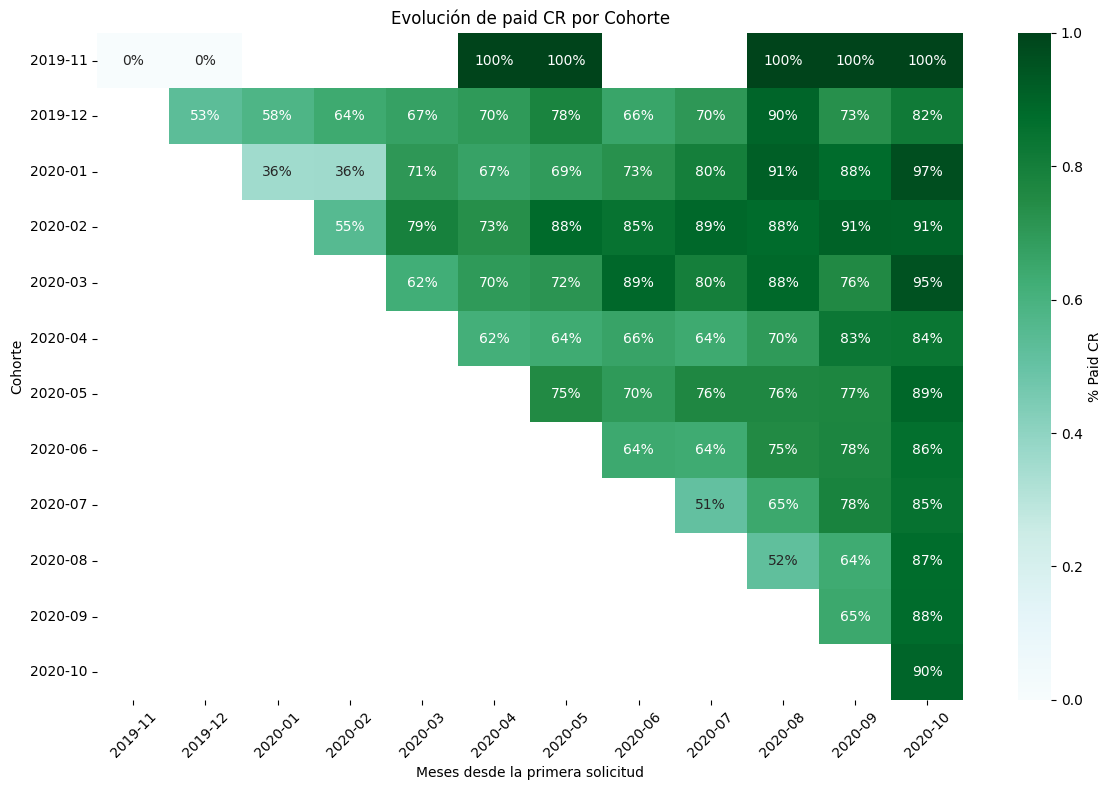

In [13]:
# Pivot the data to create a matrix of paid_cr per cohort for each month
paid_cr_heatmap_data = cohort_sizes_monthly.pivot(index='Cohorte', columns='Mes_created_at', values='paid_cr_percent_qty')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(paid_cr_heatmap_data, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn', cbar_kws={'label': '% Paid CR'})

# Add labels and title
plt.title('Evolución de paid CR por Cohorte')
plt.xlabel('Meses desde la primera solicitud')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)

# Show the heatmap
plt.tight_layout()
plt.show()

In [14]:
cohort_ltv_monthly = cohort_analysis.groupby(['Cohorte', 'Mes_created_at']).agg(
    Total_Fees=('Fees', 'sum'),  
    Clientes=('Num_Clientes', 'sum') 
).reset_index()


# Calcular el LTV mensual
cohort_ltv_monthly['LTV_Mensual'] = cohort_ltv_monthly['Total_Fees'] / cohort_ltv_monthly['Clientes']
cohort_ltv_monthly

,Cohorte,Mes_created_at,Total_Fees,Clientes,LTV_Mensual
0,2019-11,2019-11,0.0,1,0.000000
1,2019-11,2019-12,0.0,1,0.000000
2,2019-11,2020-04,0.0,1,0.000000
3,2019-11,2020-05,25.0,1,25.000000
4,2019-11,2020-08,10.0,1,10.000000
...,...,...,...,...,...
68,2020-08,2020-09,1755.0,291,6.030928
69,2020-08,2020-10,1415.0,245,5.775510
70,2020-09,2020-09,11890.0,1988,5.980885
71,2020-09,2020-10,4225.0,679,6.222386


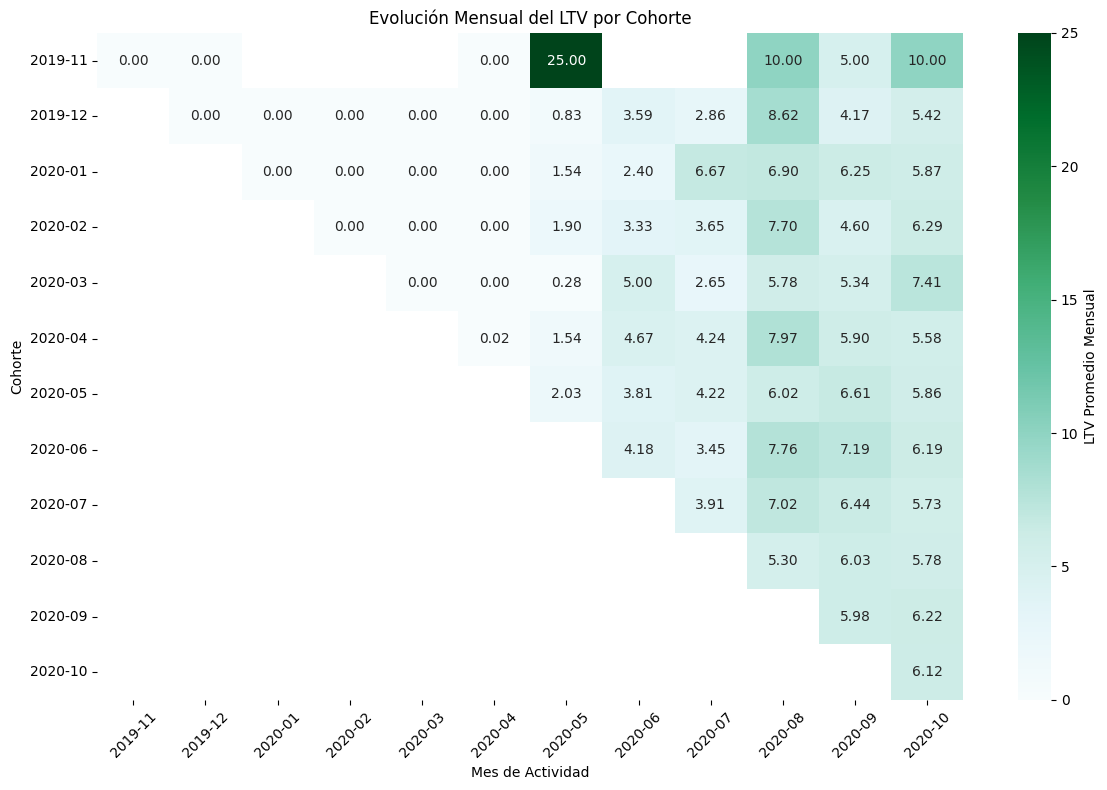

In [15]:
# Reorganizar los datos en una matriz para el heatmap
ltv_matrix = cohort_ltv_monthly.pivot(index='Cohorte', columns='Mes_created_at', values='LTV_Mensual')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=ltv_matrix, annot=True, fmt='.2f', cmap='BuGn', cbar_kws={'label': 'LTV Promedio Mensual'})
plt.title('Evolución Mensual del LTV por Cohorte')
plt.xlabel('Mes de Actividad')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

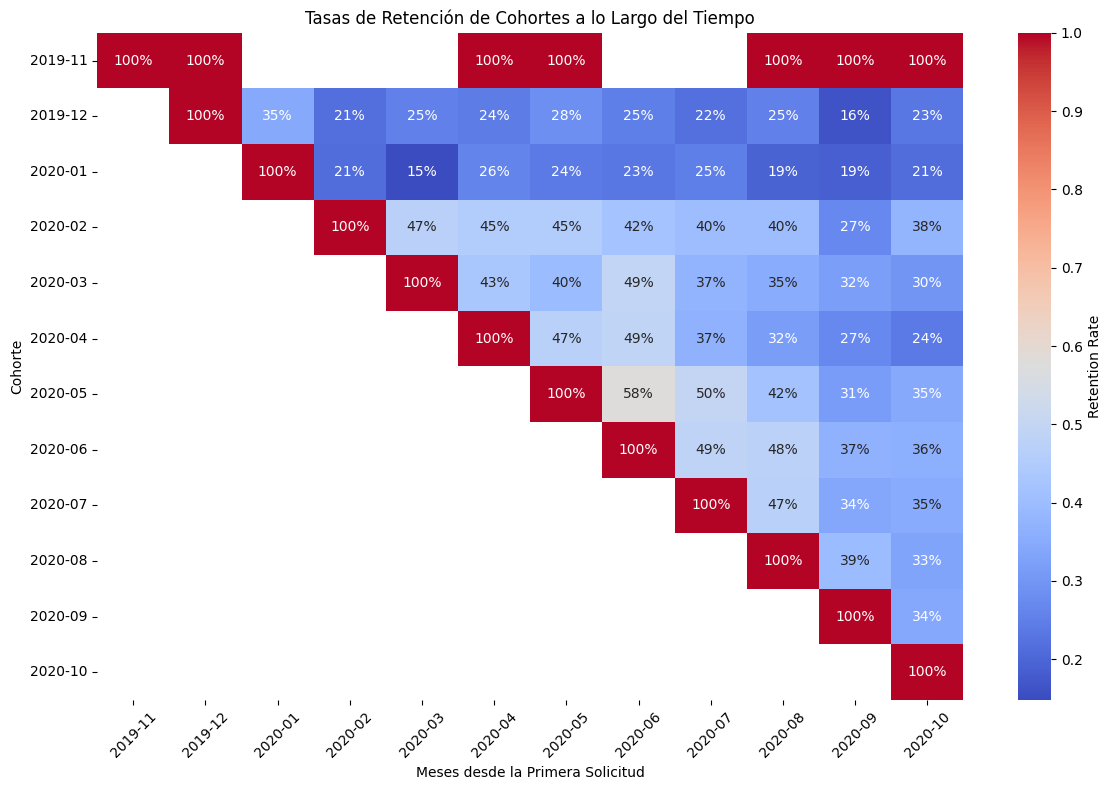

In [16]:
# Calcular el tamaño inicial de las cohortes (primer mes de cada cohorte)
cohort_ltv_monthly['Clientes_Iniciales'] = cohort_ltv_monthly.groupby('Cohorte')['Clientes'].transform('first')

# Calcular las tasas de retención
cohort_ltv_monthly['Retention_Rate'] = cohort_ltv_monthly['Clientes'] / cohort_ltv_monthly['Clientes_Iniciales']

# Crear una matriz de retención
retention_matrix = cohort_ltv_monthly.pivot(index='Cohorte', columns='Mes_created_at', values='Retention_Rate')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    retention_matrix, 
    annot=True, 
    fmt='.0%', 
    cmap='coolwarm', 
    cbar_kws={'label': 'Retention Rate'}
)
plt.title('Tasas de Retención de Cohortes a lo Largo del Tiempo')
plt.xlabel('Meses desde la Primera Solicitud')
plt.ylabel('Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




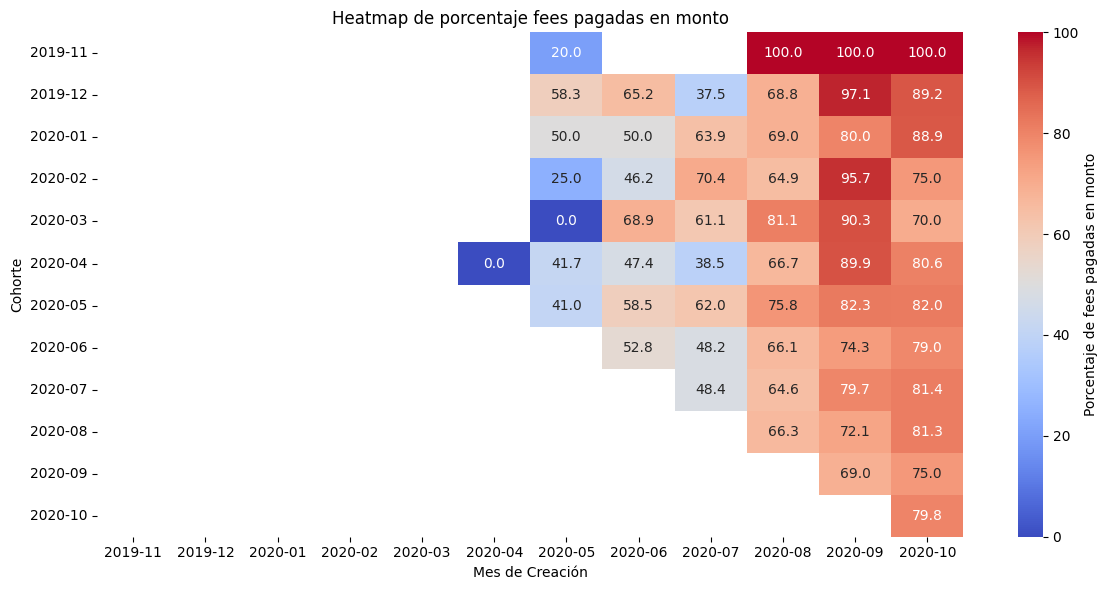

In [17]:
# Crear los datos para el heatmap
heatmap_data = cohort_analysis.pivot(
    index='Cohorte', 
    columns='Mes_created_at', 
    values='paid_fees_percent_amount'
)

# Crear la figura para el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="coolwarm", 
    cbar_kws={'label': 'Porcentaje de fees pagadas en monto'}
)

# Personalizar el heatmap
plt.title('Heatmap de porcentaje fees pagadas en monto')
plt.xlabel('Mes de Creación')
plt.ylabel('Cohorte')
plt.tight_layout()
plt.show()

In [18]:
print(cohort_analysis.dtypes)
print(cohort_analysis[['Mes_created_at', 'Num_Solicitudes']].head())

Cohorte                     period[M]
Mes_created_at              period[M]
Num_Clientes                    int64
Num_Solicitudes                 int64
Solicitudes_Instant             int64
Solicitudes_Regular             int64
Clientes_con_fees               int64
CR                            float64
Fees                          float64
paid_fees                       int64
non_paid_fees                   int64
total_paid_fees               float64
total_non_paid_fees           float64
paid_cr                         int64
non_paid_cr                     int64
total_paid_cr                 float64
total_non_paid_cr             float64
credit_lapse                  float64
credit_payment_lapse          float64
paid_fees_percent_qty         float64
paid_fees_percent_amount      float64
paid_cr_percent_qty           float64
paid_cr_percent_amount        float64
dtype: object
  Mes_created_at  Num_Solicitudes
0        2019-11                1
1        2019-12                1
2        2

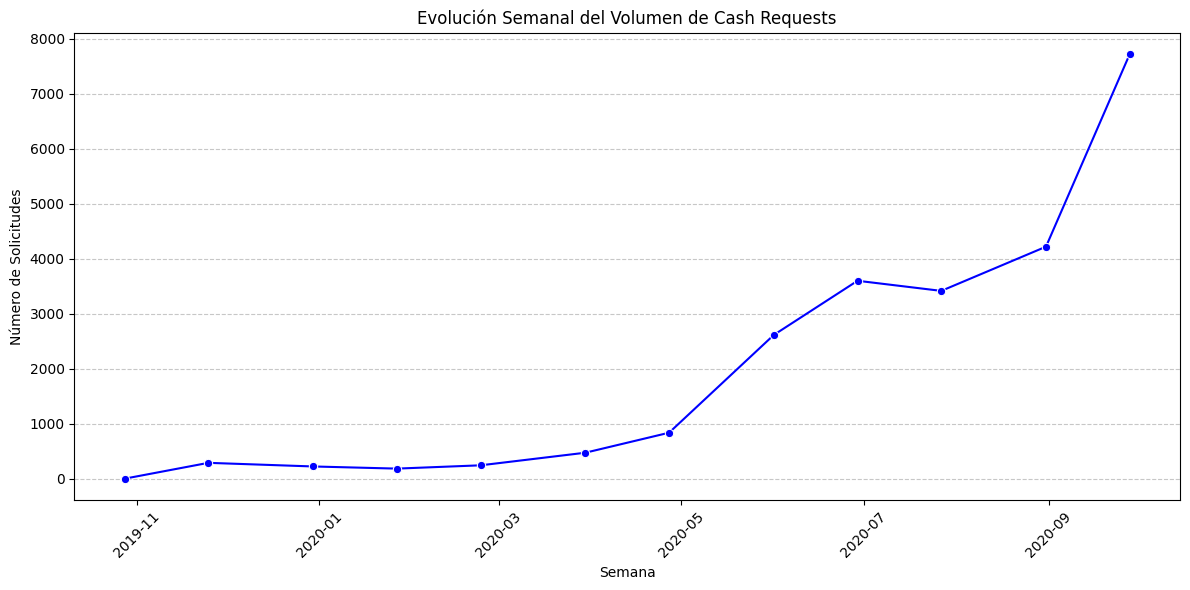

In [19]:
# Convertir Cohorte y Mes_created_at a datetime (si aún no están en datetime)
cohort_analysis['Cohorte'] = cohort_analysis['Cohorte'].dt.to_timestamp()
cohort_analysis['Mes_created_at'] = cohort_analysis['Mes_created_at'].dt.to_timestamp()

# Crear una columna de semanas basada en Mes_created_at
cohort_analysis['Semana'] = cohort_analysis['Mes_created_at'] - pd.to_timedelta(cohort_analysis['Mes_created_at'].dt.dayofweek, unit='d')

# Agrupar por semanas
weekly_data = cohort_analysis.groupby(['Semana']).agg({
    'Num_Solicitudes': 'sum',  # Total de solicitudes por semana
}).reset_index()

# Graficar la evolución de Num_Solicitudes por semana
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_data, x='Semana', y='Num_Solicitudes', marker='o', color='b')
plt.title('Evolución Semanal del Volumen de Cash Requests')
plt.xlabel('Semana')
plt.ylabel('Número de Solicitudes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


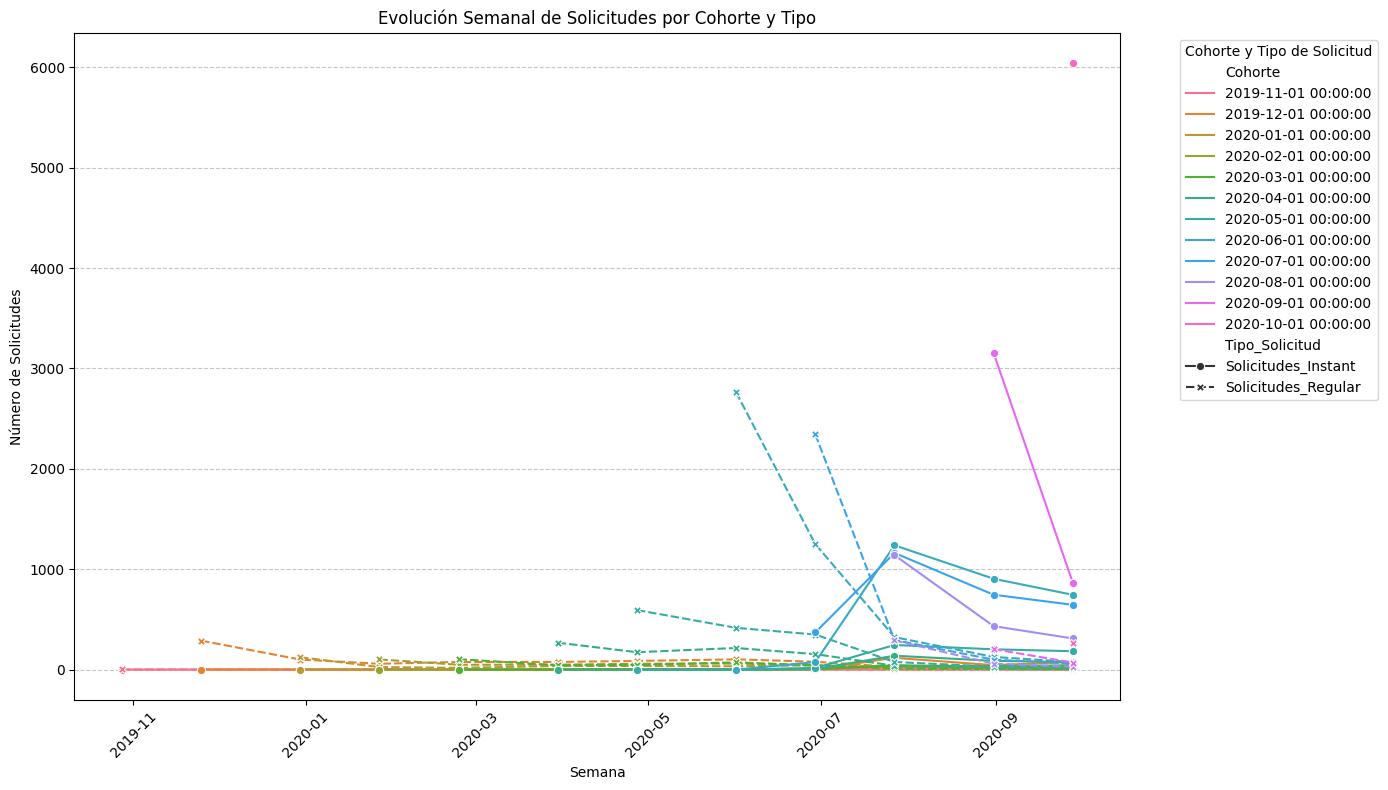

In [20]:
# Crear una columna de semanas basada en Mes_created_at
cohort_analysis['Semana'] = cohort_analysis['Mes_created_at'] - pd.to_timedelta(cohort_analysis['Mes_created_at'].dt.dayofweek, unit='d')

# Agrupar semanalmente por Cohorte y transfer_type
weekly_data = cohort_analysis.groupby(['Semana', 'Cohorte']).agg({
    'Solicitudes_Instant': 'sum',  # Total solicitudes instantáneas
    'Solicitudes_Regular': 'sum',  # Total solicitudes regulares
}).reset_index()

# Reorganizar los datos para facilitar graficar con seaborn
weekly_data_melted = pd.melt(
    weekly_data,
    id_vars=['Semana', 'Cohorte'],
    value_vars=['Solicitudes_Instant', 'Solicitudes_Regular'],
    var_name='Tipo_Solicitud',
    value_name='Total_Solicitudes'
)

# Graficar evolución por tipo de solicitud y cohorte
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=weekly_data_melted,
    x='Semana',
    y='Total_Solicitudes',
    hue='Cohorte',
    style='Tipo_Solicitud',
    markers=True
)
plt.title('Evolución Semanal de Solicitudes por Cohorte y Tipo')
plt.xlabel('Semana')
plt.ylabel('Número de Solicitudes')
plt.xticks(rotation=45)
plt.legend(title='Cohorte y Tipo de Solicitud', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

no se ve nada por el outlier que hay en 2020-10 que aplana todo lo demás.
hagamos escala logartimica

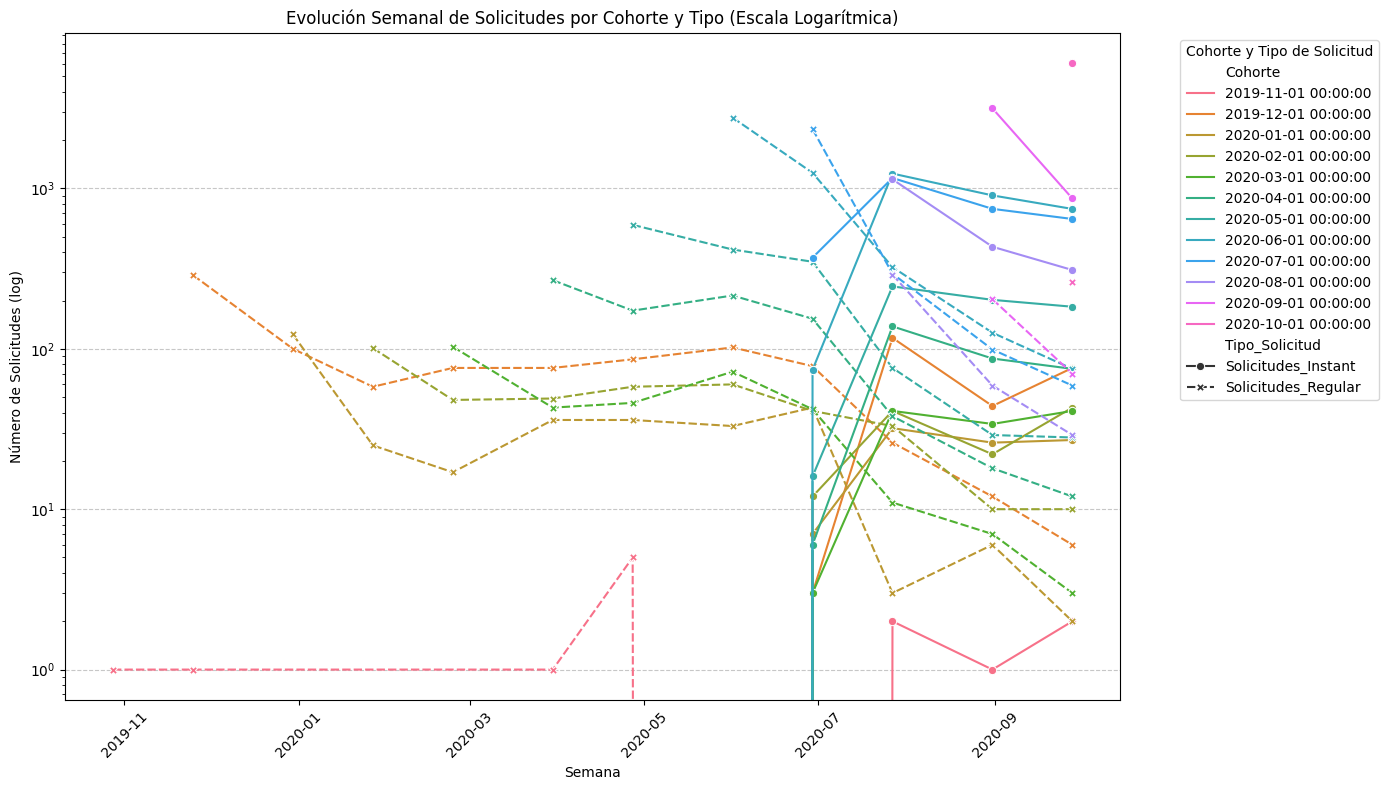

In [21]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=weekly_data_melted,
    x='Semana',
    y='Total_Solicitudes',
    hue='Cohorte',
    style='Tipo_Solicitud',
    markers=True
)
plt.yscale('log')  # Aplicar escala logarítmica
plt.title('Evolución Semanal de Solicitudes por Cohorte y Tipo (Escala Logarítmica)')
plt.xlabel('Semana')
plt.ylabel('Número de Solicitudes (log)')
plt.xticks(rotation=45)
plt.legend(title='Cohorte y Tipo de Solicitud', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
weekly_data_melted[weekly_data_melted['Cohorte']=='2020-10-01']

,Semana,Cohorte,Tipo_Solicitud,Total_Solicitudes
72,2020-09-28,2020-10-01,Solicitudes_Instant,6042
145,2020-09-28,2020-10-01,Solicitudes_Regular,262


In [23]:
# Convertir 'Mes_created_at' a datetime si no lo está
cohort_analysis['Mes_created_at'] = pd.to_datetime(cohort_analysis['Mes_created_at'].astype(str))

# Extraer el último mes del dataset
ultimo_mes = cohort_analysis['Mes_created_at'].max()

# Filtrar los datos del último mes
solicitudes_ultimo_mes = cohort_analysis[cohort_analysis['Mes_created_at'] == ultimo_mes]

In [24]:
# Calcular el total de solicitudes por tipo y cohorte en el último mes
resumen_ultimo_mes = solicitudes_ultimo_mes.groupby('Cohorte').agg(
    Total_Solicitudes=('Num_Solicitudes', 'sum'),
    Total_Solicitudes_Instant=('Solicitudes_Instant', 'sum'),
    Total_Solicitudes_Regular=('Solicitudes_Regular', 'sum')
).reset_index()

resumen_ultimo_mes

,Cohorte,Total_Solicitudes,Total_Solicitudes_Instant,Total_Solicitudes_Regular
0,2019-11-01,2,2,0
1,2019-12-01,72,76,6
2,2020-01-01,24,27,2
3,2020-02-01,42,43,10
4,2020-03-01,30,41,3
5,2020-04-01,74,75,12
6,2020-05-01,169,183,28
7,2020-06-01,648,745,75
8,2020-07-01,590,645,59
9,2020-08-01,279,310,29


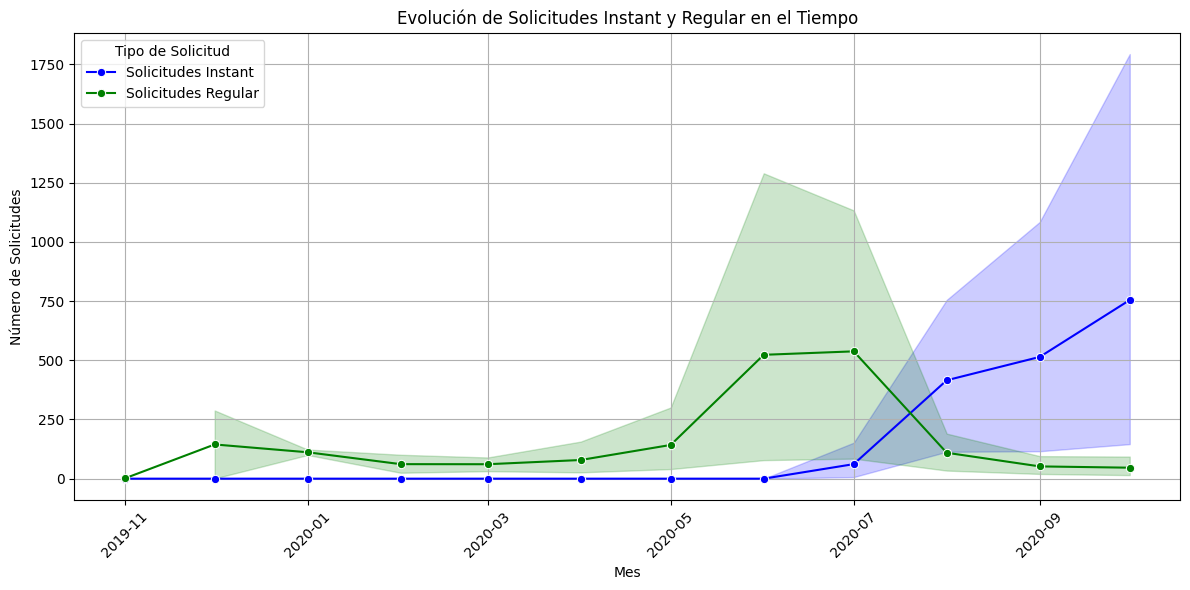

In [25]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

#por defecto intervalo confianza que grafica es del 95%
# Línea de evolución para solicitudes 'instant'
sns.lineplot(
    data=cohort_analysis,
    x='Mes_created_at',
    y='Solicitudes_Instant',
    label='Solicitudes Instant',
    marker='o',
    color='blue'
)

# Línea de evolución para solicitudes 'regular'
sns.lineplot(
    data=cohort_analysis,
    x='Mes_created_at',
    y='Solicitudes_Regular',
    label='Solicitudes Regular',
    marker='o',
    color='green'
)

# Personalizar el gráfico
plt.title('Evolución de Solicitudes Instant y Regular en el Tiempo')
plt.xlabel('Mes')
plt.ylabel('Número de Solicitudes')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.legend(title='Tipo de Solicitud')
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

el cruce de tipo de solicitud marca un cambio de comportamiento de los usuarios. y justo pasa en el mes de julio.
en agosto ya estan cambiadas y instant gana a regular. 
esto podría explicar también el descenso de cash_requests en agosto??

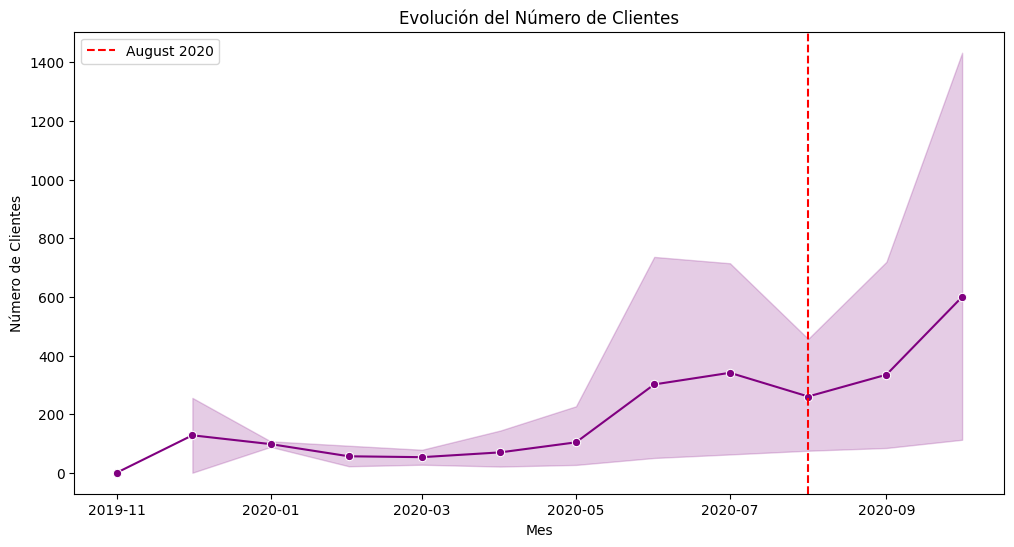

In [26]:

# Convertir el texto '2020-08' en un objeto de fecha manejable
fecha_agosto = pd.to_datetime('2020-08')

# Graficar el número de clientes únicos
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_analysis, x='Mes_created_at', y='Num_Clientes', marker='o', color='purple')
plt.axvline(x=fecha_agosto, color='red', linestyle='--', label='August 2020')
plt.title('Evolución del Número de Clientes')
plt.xlabel('Mes')
plt.ylabel('Número de Clientes')
plt.legend()
plt.show()


In [27]:
cr_cp = pm.df('cr_cp')
cr_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          23970 non-null  int64         
 1   amount                      23970 non-null  float64       
 2   status                      23970 non-null  object        
 3   created_at                  23970 non-null  datetime64[ns]
 4   updated_at                  23970 non-null  datetime64[ns]
 5   user_id                     23970 non-null  int64         
 6   moderated_at                16035 non-null  datetime64[ns]
 7   deleted_account_id          2104 non-null   float64       
 8   reimbursement_date          23970 non-null  datetime64[ns]
 9   cash_request_received_date  16289 non-null  datetime64[ns]
 10  money_back_date             16543 non-null  datetime64[ns]
 11  transfer_type               23970 non-null  object    

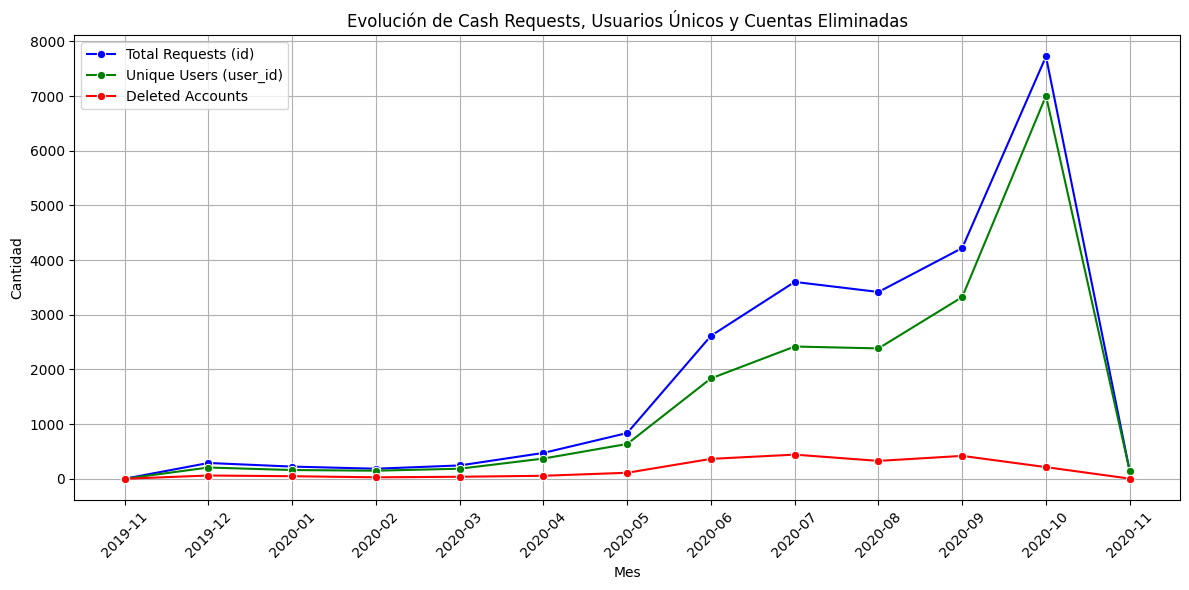

In [37]:
# Agrupamos los datos por Mes
aggregated_data = cr_cp.groupby('Mes_created_at').agg(
    total_requests=('id', 'count'),  # Número total de cash requests
    unique_users=('user_id', 'nunique'),  # Número de usuarios únicos
    deleted_accounts=('deleted_account_id', lambda x: x.notnull().sum()),  # Cuentas eliminadas
    Solicitudes_Instant=('transfer_type', lambda x: (x == 'instant').sum()),  # Solicitudes tipo 'instant' por mes
    Solicitudes_Regular=('transfer_type', lambda x: (x == 'regular').sum()),  # Solicitudes tipo 'regular' por mes
    #Clientes_con_fees=('fee', lambda x: (x > 0).sum()),  # Clientes con fees por mes
    CR=('amount', 'sum'),  # Total de adelantos por mes
    #Fees=('fee', 'sum')  # Total de fees por mes
).reset_index()
# Convertimos 'Mes_created_at' a cadena para graficar
aggregated_data['Mes_created_at'] = aggregated_data['Mes_created_at'].astype(str)

# Graficamos las métricas
plt.figure(figsize=(12, 6))
sns.lineplot(data=aggregated_data, x='Mes_created_at', y='total_requests', label='Total Requests (id)', marker='o', color='blue')
sns.lineplot(data=aggregated_data, x='Mes_created_at', y='unique_users', label='Unique Users (user_id)', marker='o', color='green')
sns.lineplot(data=aggregated_data, x='Mes_created_at', y='deleted_accounts', label='Deleted Accounts', marker='o', color='red')

# Ajustamos el título y los ejes
plt.title('Evolución de Cash Requests, Usuarios Únicos y Cuentas Eliminadas')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

parece q no es por el numero de usuario. 
podria deberse a que en agosto trabajan menos y hubo menos manual check? no porque aparecerian como creados igualmente en ese mes
era agosto de 2020, pandemia. la gente no podia irse de vacaciones facilmente. había restricciones.

In [38]:
aggregated_data

,Mes_created_at,total_requests,unique_users,deleted_accounts,Solicitudes_Instant,Solicitudes_Regular,CR
0,2019-11,1,1,0,0,1,1.0
1,2019-12,289,206,60,0,289,27297.0
2,2020-01,223,160,47,0,223,21587.0
3,2020-02,184,148,27,0,184,16653.0
4,2020-03,244,184,37,0,244,23549.0
5,2020-04,473,370,55,0,473,46093.0
6,2020-05,837,637,110,0,837,79236.0
7,2020-06,2615,1836,364,0,2615,246026.0
8,2020-07,3601,2419,442,344,3257,328187.0
9,2020-08,3417,2385,327,2506,911,287633.0


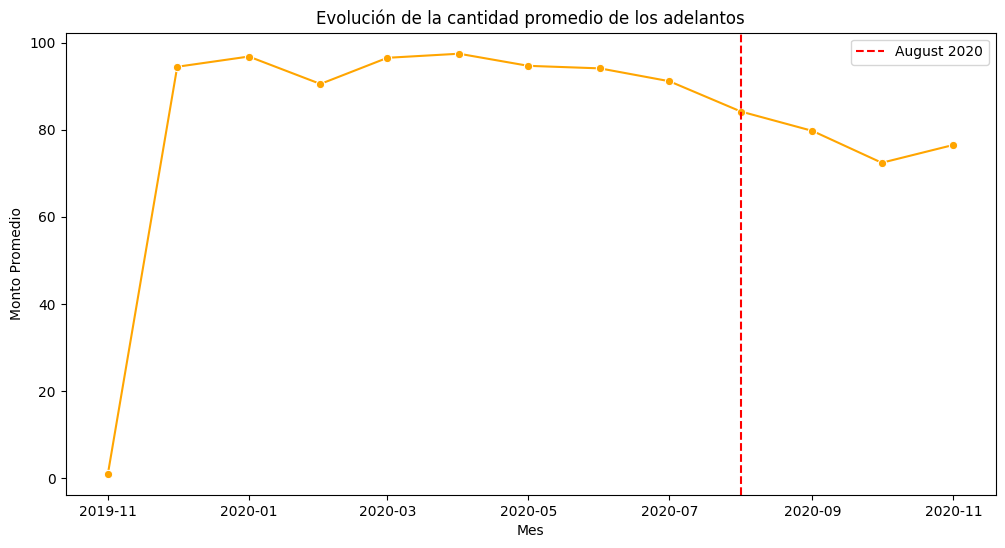

In [42]:
# Calcular y graficar el tamaño promedio de los adelantos
# Asegúrate de que los valores en 'Mes_created_at' sean cadenas
# Asegúrate de que 'Mes_created_at' sea datetime
aggregated_data['Mes_created_at'] = pd.to_datetime(aggregated_data['Mes_created_at'])
# CR= Total de adelantos por cohorte y mes / Num solicitudes (id_cash_request, q son unicos)
aggregated_data['Tamaño_Adelanto_Promedio'] = aggregated_data['CR'] / aggregated_data['total_requests']
plt.figure(figsize=(12, 6))
sns.lineplot(data=aggregated_data, x='Mes_created_at', y='Tamaño_Adelanto_Promedio', marker='o', color='orange')
plt.axvline(x=fecha_agosto, color='red', linestyle='--', label='August 2020')
plt.title('Evolución de la cantidad promedio de los adelantos')
plt.xlabel('Mes')
plt.ylabel('Monto Promedio')
plt.legend()
plt.show()

In [29]:
agosto_cr_cp=cr_cp[cr_cp['Mes_created_at']=='2020-08-01']
agosto_cr_cp.describe()

,id,amount,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,send_at,reco_creation,reco_last_update
count,3417.000000,3417.000000,3417,3417,3417.000000,2996,327.000000,3417,2010,1959,3417,438,438
mean,12278.574188,84.177056,2020-08-14 03:15:47.081378304,2020-10-27 00:49:29.861125120,18011.985660,2020-08-14 01:46:26.327537664,10236.272171,2020-09-11 06:55:47.397883392,2020-08-16 17:19:31.343283456,2020-09-21 21:23:41.013106944,2020-08-21 03:15:47.044975360,2020-09-28 17:02:28.100310528,2020-10-20 16:41:06.624347904
min,10402.000000,5.000000,2020-08-01 00:02:37.544134,2020-08-01 14:26:28.440960,0.000000,2020-08-01 14:24:46.243615,3705.000000,2020-08-09 22:00:00,2020-08-01 00:00:00,2020-08-03 22:00:00,2020-08-08 00:02:37.543638,2020-08-11 22:23:34.384296,2020-08-20 22:47:32.699339
25%,11355.000000,50.000000,2020-08-07 13:08:59.641147904,2020-08-18 07:51:20.947109888,8218.000000,2020-08-07 10:01:24.728329728,4255.000000,2020-09-02 22:00:00,2020-08-11 00:00:00,2020-09-03 19:00:09.322539008,2020-08-14 13:08:59.640665088,2020-09-09 20:52:09.372594176,2020-09-24 23:10:53.333425408
50%,12267.000000,100.000000,2020-08-12 21:06:24.381277952,2020-12-18 13:09:22.001786112,17986.000000,2020-08-12 17:32:08.486696448,6334.000000,2020-09-07 22:00:00,2020-08-16 00:00:00,2020-09-10 19:03:42.093612032,2020-08-19 21:06:24.327131904,2020-09-25 22:25:22.836507392,2020-10-10 23:07:31.282010112
75%,13215.000000,100.000000,2020-08-19 16:49:05.657277952,2020-12-18 13:10:18.203787008,28527.000000,2020-08-20 08:52:29.090190080,17206.000000,2020-09-12 23:51:00,2020-08-22 00:00:00,2020-10-05 13:59:58.304707072,2020-08-26 16:49:05.601824,2020-10-10 23:08:25.866855680,2020-11-06 07:51:39.561033472
max,14163.000000,100.000000,2020-08-31 22:46:39.108592,2021-02-12 04:15:27.796931,36721.000000,2020-09-01 08:41:44.520394,27563.000000,2020-12-31 11:00:00,2020-09-09 00:00:00,2021-02-12 04:15:27.739102,2020-09-07 22:46:39.022665,2020-12-18 22:34:19.261753,2021-02-12 04:15:27.744320
std,1081.377001,23.780071,NaN,NaN,11738.531265,NaN,7378.143191,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_8486/2214977031.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Num_Moderated'].fillna(0, inplace=True)


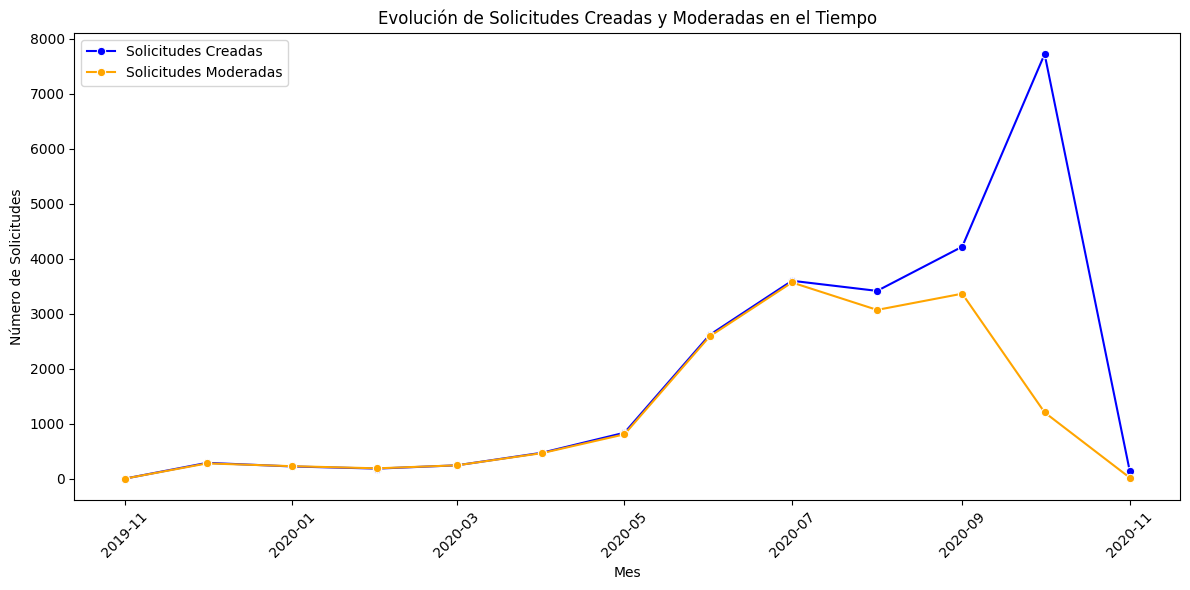

In [30]:
# Asegúrate de que 'created_at' y 'moderated_at' sean de tipo datetime
cr_cp['created_at'] = pd.to_datetime(cr_cp['created_at'])
cr_cp['moderated_at'] = pd.to_datetime(cr_cp['moderated_at'], errors='coerce')  # Convertir 'moderated_at' y forzar nulos si hay errores

# Agrupar por mes y contar las solicitudes creadas (basadas en 'created_at')
created_by_month = cr_cp.groupby(cr_cp['created_at'].dt.to_period('M')).size().reset_index(name='Num_Created')

# Agrupar por mes y contar las solicitudes moderadas (basadas en 'moderated_at', solo no nulos)
moderated_by_month = cr_cp[cr_cp['moderated_at'].notnull()].groupby(cr_cp['moderated_at'].dt.to_period('M')).size().reset_index(name='Num_Moderated')

# Convertir las columnas de 'created_at' y 'moderated_at' en ambos dataframes a 'datetime' para poder graficar
created_by_month['Mes_created_at_datetime'] = created_by_month['created_at'].dt.to_timestamp()
moderated_by_month['Mes_moderated_at_datetime'] = moderated_by_month['moderated_at'].dt.to_timestamp()

# Unir los dataframes por la columna correspondiente
merged_data = pd.merge(created_by_month, moderated_by_month, left_on='created_at', right_on='moderated_at', how='left')

# Rellenar los valores nulos de 'Num_Moderated' con 0 en caso de que no haya solicitudes moderadas en algún mes
merged_data['Num_Moderated'].fillna(0, inplace=True)

#quitar registros de 2020-11

# Graficar la evolución mensual
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='Mes_created_at_datetime', y='Num_Created', marker='o', label='Solicitudes Creadas', color='blue')
sns.lineplot(data=merged_data, x='Mes_moderated_at_datetime', y='Num_Moderated', marker='o', label='Solicitudes Moderadas', color='orange')

# Personalizar el gráfico
plt.title('Evolución de Solicitudes Creadas y Moderadas en el Tiempo')
plt.xlabel('Mes')
plt.ylabel('Número de Solicitudes')
plt.xticks(rotation=45)  # Rotar las fechas para mejor legibilidad
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


pues moderan menos en julio pero recuperan casi mismo nivel en agosto. no es eso.

veamos si cambió otra cosa, miremos la cantidad de adelanto si varía.


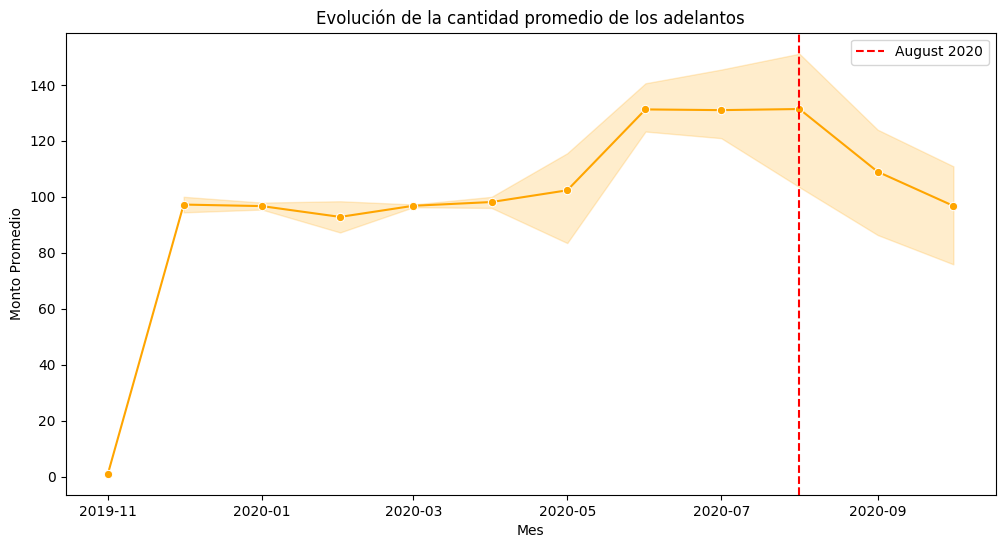

In [31]:
# Calcular y graficar el tamaño promedio de los adelantos
# CR= Total de adelantos por cohorte y mes / Num solicitudes (id_cash_request, q son unicos)
cohort_analysis['Tamaño_Adelanto_Promedio'] = cohort_analysis['CR'] / cohort_analysis['Num_Solicitudes']
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_analysis, x='Mes_created_at', y='Tamaño_Adelanto_Promedio', marker='o', color='orange')
plt.axvline(x=fecha_agosto, color='red', linestyle='--', label='August 2020')
plt.title('Evolución de la cantidad promedio de los adelantos')
plt.xlabel('Mes')
plt.ylabel('Monto Promedio')
plt.legend()
plt.show()

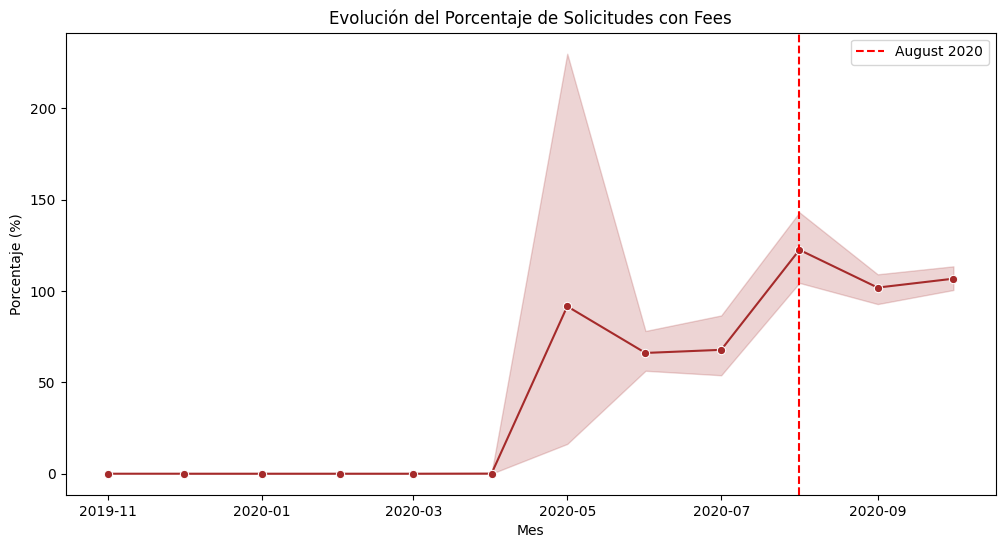

In [32]:
# Calcular y graficar el porcentaje de solicitudes con fees
cohort_analysis['Porcentaje_Fees'] = (cohort_analysis['Clientes_con_fees'] / cohort_analysis['Num_Solicitudes']) * 100
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_analysis, x='Mes_created_at', y='Porcentaje_Fees', marker='o', color='brown')
plt.axvline(x=fecha_agosto, color='red', linestyle='--', label='August 2020')
plt.title('Evolución del Porcentaje de Solicitudes con Fees')
plt.xlabel('Mes')
plt.ylabel('Porcentaje (%)')
plt.legend()
plt.show()

hay más cash_request con fee asociada, quizás porque cambiaron a instant (como vimos más arriba).



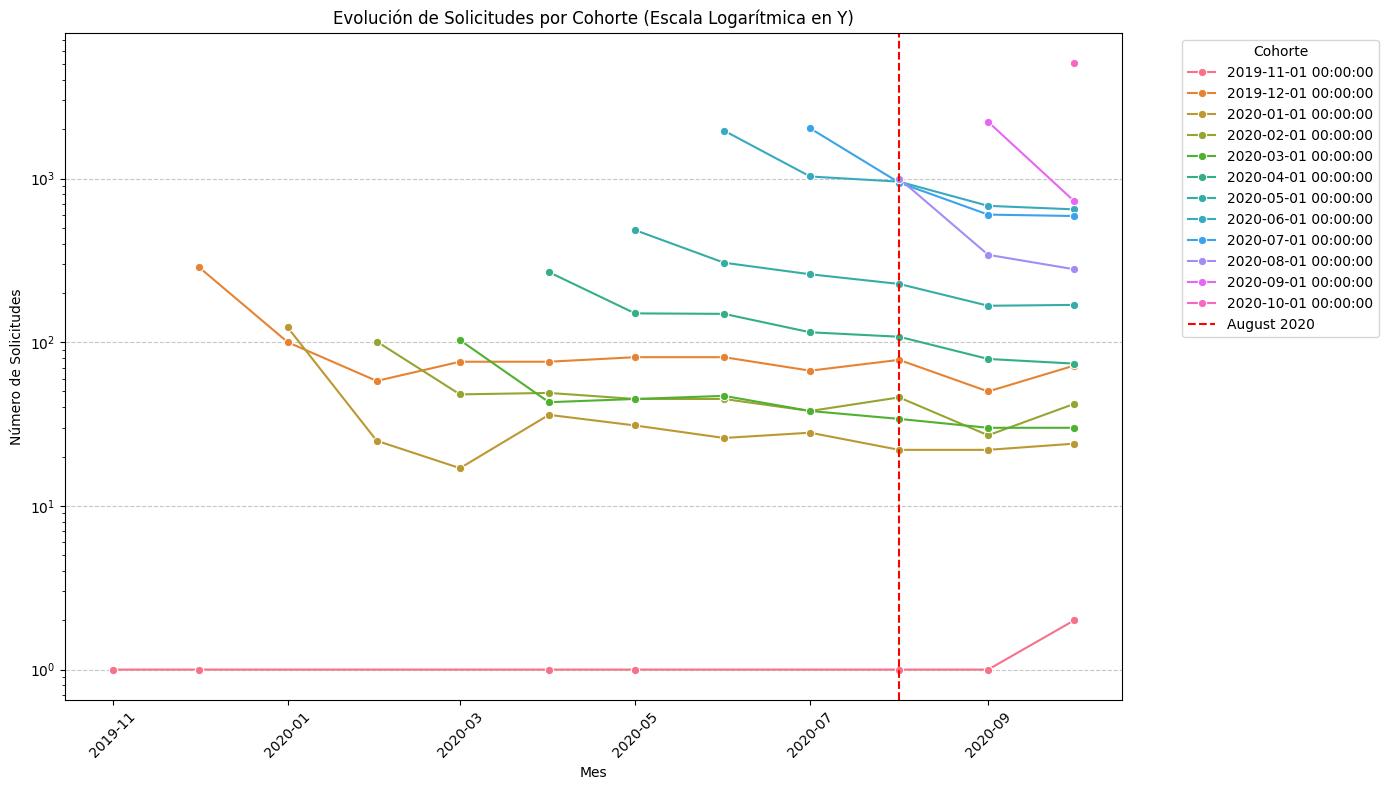

In [33]:
# Graficar la evolución de solicitudes por cohortes con escala logarítmica en el eje Y
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=cohort_analysis,
    x='Mes_created_at',
    y='Num_Solicitudes',
    hue='Cohorte',
    marker='o'
)
plt.axvline(x=fecha_agosto, color='red', linestyle='--', label='August 2020')  # Línea para agosto 2020
plt.title('Evolución de Solicitudes por Cohorte (Escala Logarítmica en Y)')
plt.xlabel('Mes')
plt.ylabel('Número de Solicitudes')
#plt.legend(title='Cohorte')
# Colocar la leyenda fuera del gráfico
plt.legend(title='Cohorte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Aplicar escala logarítmica al eje Y
plt.yscale('log')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

la cohorte de 2020-07 es la que más desciende en agosto 2020.